# ADS 509 Assignment 2.1: Tokenization, Normalization, Descriptive Statistics 

This notebook holds Assignment 2.1 for Module 2 in ADS 509, Applied Text Mining. Work through this notebook, writing code and answering questions where required. 

In the previous assignment you pulled lyrics data on two artists. In this assignment we explore this data set and a pull from the now-defunct Twitter API for the artists Cher and Robyn.  If, for some reason, you did not complete that previous assignment, data to use for this assignment can be found in the assignment materials section of Canvas. 

This assignment asks you to write a short function to calculate some descriptive statistics on a piece of text. Then you are asked to find some interesting and unique statistics on your corpora. 


## General Assignment Instructions

These instructions are included in every assignment, to remind you of the coding standards for the class. Feel free to delete this cell after reading it. 

One sign of mature code is conforming to a style guide. We recommend the [Google Python Style Guide](https://google.github.io/styleguide/pyguide.html). If you use a different style guide, please include a cell with a link. 

Your code should be relatively easy-to-read, sensibly commented, and clean. Writing code is a messy process, so please be sure to edit your final submission. Remove any cells that are not needed or parts of cells that contain unnecessary code. Remove inessential `import` statements and make sure that all such statements are moved into the designated cell. 

Make use of non-code cells for written commentary. These cells should be grammatical and clearly written. In some of these cells you will have questions to answer. The questions will be marked by a "Q:" and will have a corresponding "A:" spot for you. *Make sure to answer every question marked with a `Q:` for full credit.* 


In [1]:
import os
import re
import emoji
import pandas as pd
import numpy as np

from collections import Counter
from nltk.corpus import stopwords # Need to comment and download stopwords (below) first
from string import punctuation

In [2]:
# Add any additional import statements you need here
# import nltk
# nltk.download('stopwords')
import string
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt

In [3]:
# change `data_location` to the location of the folder on your machine.
data_location = os.path.expanduser("~/Desktop/usd_ADS/github/ads509-mod2/M1_Results/")

# These subfolders should still work if you correctly stored the 
# data from the Module 1 assignment
twitter_folder = "twitter/"
lyrics_folder = "lyrics/"

In [4]:
def descriptive_stats(tokens, num_tokens = 5, verbose=True) :
    """
        Given a list of tokens, print number of tokens, number of unique tokens, 
        number of characters, lexical diversity (https://en.wikipedia.org/wiki/Lexical_diversity), 
        and num_tokens most common tokens. Return a list with the number of tokens, number
        of unique tokens, lexical diversity, and number of characters. 
    
    """

    # Fill in the correct values here. 
    num_tokens = len(tokens)
    num_unique_tokens = len(set(tokens))
    lexical_diversity = num_unique_tokens / num_tokens
    num_characters = sum(len(token) for token in tokens)

    most_common_tokens = Counter(tokens).most_common(num_tokens)
    
    if verbose :        
        print(f"There are {num_tokens} tokens in the data.")
        print(f"There are {num_unique_tokens} unique tokens in the data.")
        print(f"There are {num_characters} characters in the data.")
        print(f"The lexical diversity is {lexical_diversity:.3f} in the data.")
           
        print(f"The five most common tokens are:") # print the five most common tokens 
        for token, count in most_common_tokens[:5]:
            print(f"{token}: {count}")
        print("\n")
    return([num_tokens, num_unique_tokens,
            lexical_diversity,
            num_characters])
    

In [5]:
text = """here is some example text with other example text here in this text""".split()
assert(descriptive_stats(text, verbose=True)[0] == 13)
assert(descriptive_stats(text, verbose=False)[1] == 9)
assert(abs(descriptive_stats(text, verbose=False)[2] - 0.69) < 0.02)
assert(descriptive_stats(text, verbose=False)[3] == 55)


There are 13 tokens in the data.
There are 9 unique tokens in the data.
There are 55 characters in the data.
The lexical diversity is 0.692 in the data.
The five most common tokens are:
text: 3
here: 2
example: 2
is: 1
some: 1




Q: Why is it beneficial to use assertion statements in your code? 

A: Assertion statements are beneficial in checking for values and possible errors that may arise when testing conditional statements. In the case of this sample text test, the assert allows the descriptive_stats function to assume or force the value of each of its expected output fields where only to standard output will the statement with verbose print the descriptive statistics. If there conditional inside the assert statement evaluates to false, then an error would be raised to help identify where to correct possible vulnerable logic.

## Data Input

Now read in each of the corpora. For the lyrics data, it may be convenient to store the entire contents of the file to make it easier to inspect the titles individually, as you'll do in the last part of the assignment. In the solution, I stored the lyrics data in a dictionary with two dimensions of keys: artist and song. The value was the file contents. A data frame would work equally well. 

For the Twitter data, we only need the description field for this assignment. Feel free all the descriptions read it into a data structure. In the solution, I stored the descriptions as a dictionary of lists, with the key being the artist. 




### Reference

Python | remove punctuation from string. (2023, July 11). GeeksforGeeks. Retrieved September 15, 2024, from https://www.geeksforgeeks.org/python-remove-punctuation-from-string/

### Read in lyrics data

In [6]:
# Read in the lyrics data as a data frame with artist and song as multi-index and lyrics as the value
lyrics_path = os.path.join(data_location, lyrics_folder)
data = []
punctuation = string.punctuation + "'" # adding because it is one of the top tokens
sans_punct = str.maketrans('', '', string.punctuation) # Clean punctuation
for artist_folder in os.listdir(lyrics_path):
    artist_path = os.path.join(lyrics_path, artist_folder)
    if os.path.isdir(artist_path):
        for filename in os.listdir(artist_path):
            if filename.endswith(".txt"):
                file_path = os.path.join(artist_path, filename)
                with open(file_path, 'r', encoding='utf-8') as file:
                    content = file.read()
                    lines = content.split('\n')
                    song_title = lines[0].strip('"') # Title in quotations
                    lyrics = ' '.join(lines[4:]).strip() # Lyrics start on line 4
                    lyrics = ' '.join(lyrics.split()) # Make lyrics space-separated only
                    lyrics = lyrics.translate(sans_punct) # Remove punctuation
                    lyrics = lyrics.lower() # Normalize text to lower case
                    data.append([artist_folder, song_title, lyrics])
df = pd.DataFrame(data, columns=['artist', 'song', 'lyrics'])
df.set_index(['artist', 'song'], inplace=True)
                    

#### Verify output

In [7]:
df.head()

lyrics
artist song                                                             
robyn  Include Me Out  it is really very simple just a single pulse r...
       Electric        electric its electric its a natural high elect...
       Beach 2K20      so you wanna go out how you gonna get there ok...
       Love Kills      if youre looking for love get a heart made of ...
       Time Machine    hey what did i do cant believe the fit i just ...

### Read in Twitter data

In [8]:
# Read in the twitter data
twitter_path = os.path.join(data_location, twitter_folder)
data = []
for filename in os.listdir(twitter_path):
    if filename.endswith("_data.txt"):
        file_path = os.path.join(twitter_path, filename)
        desc_df = pd.read_csv(file_path, sep='\t', on_bad_lines='skip')
        if 'description' in desc_df.columns:
            artist = filename.split('_')[0]
            descriptions = desc_df['description'].tolist()
            for description in descriptions:
                data.append([artist, description])

descriptions_df = pd.DataFrame(data, columns=['artist', 'description'])
descriptions_df.set_index('artist', inplace=True)

#### Verify output

In [9]:
# Check dataframe was imported correctly
print(descriptions_df.loc['cher']['description'].head())
print(descriptions_df.loc['robynkonichiwa']['description'].head())

artist
cher                                                  NaN
cher             𝙿𝚛𝚘𝚞𝚍 𝚜𝚞𝚙𝚙𝚘𝚛𝚝𝚎𝚛 𝚘𝚏 𝚖𝚎𝚜𝚜𝚢 𝚋𝚞𝚗𝚜 & 𝚕𝚎𝚐𝚐𝚒𝚗𝚐𝚜
cher            163㎝／愛かっぷ💜26歳🍒 工〇好きな女の子💓 フォローしてくれたらDMします🧡
cher                                                  csu
cher    Writer @Washinformer @SpelmanCollege alumna #D...
Name: description, dtype: object
artist
robynkonichiwa    I love chill •Facebook / Instagram / SoundClou...
robynkonichiwa    books, movies, music, nature & TV shows. OG Sw...
robynkonichiwa    (Am)auteur en herbe 🌱 - juriste en paille 🤡 - ...
robynkonichiwa    This Twitter profile is full of sarcasm and ra...
robynkonichiwa    Flora Youssef - Blogger & Founder Posting revi...
Name: description, dtype: object


## Data Cleaning

Now clean and tokenize your data. Remove punctuation chacters (available in the `punctuation` object in the `string` library), split on whitespace, fold to lowercase, and remove stopwords. Store your cleaned data, which must be accessible as an interable for `descriptive_stats`, in new objects or in new columns in your data frame. 



In [10]:
punctuation = set(punctuation) # speeds up comparison

### Note:

When coding, I imported and cleaned the lyrics in the same instance first before doing the same to the Twitter data, which will be handled in a combined and modified function to clean instead of at import like with lyrics data.

### Clean Twitter Data

In [11]:
# create your clean twitter data here
stop_words = set(stopwords.words('english'))
punctuation = string.punctuation + "'" # Apostrophe not included by default, so add
sans_punct = str.maketrans('', '', string.punctuation) # Clean punctuation

def clean_desc(text):
    if not isinstance(text, str): # Check if text is a string
        return '' # Else return empty string
    text = text.translate(sans_punct) # Remove punctuation
    text = text.lower() # Normalize to lowercase
    words = text.split() # Split text into words for tokenization to remove stopwords
    sans_stop_words = [word for word in words if word.lower() not in stop_words] # Remove stopwords
    return ' '.join(sans_stop_words) # Return to single object now that stopwords are removed

# Apply clean_desc to the 'description' column of descriptions_df
descriptions_df['description'] = descriptions_df['description'].astype(str)
descriptions_df['description'] = descriptions_df['description'].apply(clean_desc)

#### Verify output

In [12]:
# Check dataframe was cleaned correctly
print(descriptions_df.loc['cher']['description'].head())
print(descriptions_df.loc['robynkonichiwa']['description'].head())

artist
cher                                                  nan
cher               𝙿𝚛𝚘𝚞𝚍 𝚜𝚞𝚙𝚙𝚘𝚛𝚝𝚎𝚛 𝚘𝚏 𝚖𝚎𝚜𝚜𝚢 𝚋𝚞𝚗𝚜 𝚕𝚎𝚐𝚐𝚒𝚗𝚐𝚜
cher            163㎝／愛かっぷ💜26歳🍒 工〇好きな女の子💓 フォローしてくれたらdmします🧡
cher                                                  csu
cher    writer washinformer spelmancollege alumna dcna...
Name: description, dtype: object
artist
robynkonichiwa    love chill •facebook instagram soundcloud ange...
robynkonichiwa    books movies music nature tv shows og sweetee ...
robynkonichiwa    amauteur en herbe 🌱 juriste en paille 🤡 ami de...
robynkonichiwa    twitter profile full sarcasm rants occasional ...
robynkonichiwa    flora youssef blogger founder posting review a...
Name: description, dtype: object


### Clean lyrics data

### Note: 

On lyrics, I happened to already remove punctuation characters, split on whitespace, and fold to lowercase above during the data input section, so please refer to that section for three of the four cleaning tasks. I did not remove stopwords at this point of the notebook, which I will complete in this section as the only task remaining to clean the lyrics.

### Reference

How to clean and preprocess text data with Pandas (3 examples). (2024, February 28). Sling Academy. Retrieved September 15, 2024, from https://www.slingacademy.com/article/how-to-clean-and-preprocess-text-data-with-pandas-3-examples/#Example_2_Removing_Stop_Words

In [13]:
stop_words = set(stopwords.words('english'))

def remove_stopwords(lyrics):
    words = lyrics.split()
    filtered_words = [word for word in words if word.lower() not in stop_words]
    return ' '.join(filtered_words)

df['lyrics'] = df['lyrics'].apply(remove_stopwords)
df.head()

lyrics
artist song                                                             
robyn  Include Me Out  really simple single pulse repeated regular in...
       Electric        electric electric natural high electric dont a...
       Beach 2K20      wanna go gonna get ok call someone alright ok ...
       Love Kills      youre looking love get heart made steel cus kn...
       Time Machine    hey cant believe fit threw stupid wanted react...

#### Verified that punctuation, whitespace, and case, and stopwords handled on output for lyrics

## Basic Descriptive Statistics

Call your `descriptive_stats` function on both your lyrics data and your twitter data and for both artists (four total calls). 

### Check index and define functions for different DataFrame data

In [14]:
descriptions_df

,description
artist,
cher,nan
cher,𝙿𝚛𝚘𝚞𝚍 𝚜𝚞𝚙𝚙𝚘𝚛𝚝𝚎𝚛 𝚘𝚏 𝚖𝚎𝚜𝚜𝚢 𝚋𝚞𝚗𝚜 𝚕𝚎𝚐𝚐𝚒𝚗𝚐𝚜
cher,163㎝／愛かっぷ💜26歳🍒 工〇好きな女の子💓 フォローしてくれたらdmします🧡
cher,csu
cher,writer washinformer spelmancollege alumna dcna...
...,...
robynkonichiwa,singer songs type 1 diabetic tired jakelgiles ...
robynkonichiwa,dadx2 conarch photographer dk stemgrønnest grø...
robynkonichiwa,year change life still year ✨😌


In [15]:
# calls to descriptive_stats here

# Ensure DataFrame has the proper index
if not df.index.names == ['artist', 'song']:
    df.set_index(['artist', 'song'], inplace=True)

# Need to combine all lyrics into a single object for descriptive_stats to work
def lyrics_stats(df):
    for artist in df.index.get_level_values('artist').unique():
        lyrics = ' '. join(df.loc[artist]['lyrics'])
        tokens = word_tokenize(lyrics)
        print(f"Lyrics statistics for {artist}:")
        descriptive_stats(tokens)

# Ensure DataFrame has the proper index
if descriptions_df.index.name != 'artist':
    descriptions_df.set_index('artist', inplace = True)

def twitter_stats(df):
    for artist in descriptions_df.index.unique():
        descriptions = ' '.join(descriptions_df.loc[artist]['description'])
        tokens = word_tokenize(descriptions)
        print(f"Twitter statistics for {artist}:")
        descriptive_stats(tokens)

### Call lyrics_stats and twitter_stats for each unique artist (4 total)

In [16]:
print(lyrics_stats(df))
print(twitter_stats(descriptions_df))

Lyrics statistics for robyn:
There are 15246 tokens in the data.
There are 2139 unique tokens in the data.
There are 72804 characters in the data.
The lexical diversity is 0.140 in the data.
The five most common tokens are:
know: 305
im: 299
dont: 297
got: 274
love: 269


Lyrics statistics for cher:
There are 35722 tokens in the data.
There are 3687 unique tokens in the data.
There are 169244 characters in the data.
The lexical diversity is 0.103 in the data.
The five most common tokens are:
love: 966
im: 511
know: 480
dont: 430
na: 348


None
Twitter statistics for cher:
There are 18331271 tokens in the data.
There are 1677532 unique tokens in the data.
There are 101904876 characters in the data.
The lexical diversity is 0.092 in the data.
The five most common tokens are:
nan: 1953973
love: 214807
im: 139117
life: 123768
music: 88236


Twitter statistics for robynkonichiwa:
There are 1717799 tokens in the data.
There are 268638 unique tokens in the data.
There are 9891691 characters i

Q: How do you think the "top 5 words" would be different if we left stopwords in the data? 

A: Leaving the top 5 words would limit the usefulness of being able to identify "rare" words, which may lead to underfitting the corpus due to high-frequency words. Removing these words increases the likelihood that we will find more unique words that are representative of the corpus.

---

Q: What were your prior beliefs about the lexical diversity between the artists? Does the difference (or lack thereof) in lexical diversity between the artists conform to your prior beliefs? 

A: Prior beliefs about lexical diversity would be that a lower amount of it would suggest a greater use of repeated refrains or phrases in a given song. As I am using the default corpus containing songs from Cher and Robyn, I am not familiar with either of their works. I would assume a priori that artists with a corpus of older songs would have more diversity due to the relative ubiquity of the internet that might make newer songs more similar or with more repeated token usage and patterns of use. This pattern holds true with song lyrics, but does not follow with their respective Twitter follower data.



## Specialty Statistics

The descriptive statistics we have calculated are quite generic. You will now calculate a handful of statistics tailored to these data.

1. Ten most common emojis by artist in the twitter descriptions.
1. Ten most common hashtags by artist in the twitter descriptions.
1. Five most common words in song titles by artist. 
1. For each artist, a histogram of song lengths (in terms of number of tokens) 

We can use the `emoji` library to help us identify emojis and you have been given a function to help you.


In [17]:
assert(emoji.is_emoji("❤️"))
assert(not emoji.is_emoji(":-)"))

### Reference

Emoji (n.d.). Readthedocs. Retrieved September 16, 2024, from https://emoji-python.readthedocs.io/en/stable/

### Emojis 😁

What are the ten most common emojis by artist in the twitter descriptions? 


In [18]:
# Check to see if text contains an element in emoji.EMOJI_DATA dictionary
def extract_emoji(text):
    return [e for e in text if e in emoji.EMOJI_DATA]

def top_ten_emoji_by_artist(df, column='description', num_emojis=10):
    artist_emoji = {}
    for artist in df.index.unique():
        descriptions = ' '.join(df.loc[artist][column]) # Combine descriptions by artist
        emojis = extract_emoji(descriptions) # Extract emojis from descriptions
        emoji_counter = Counter(emojis) # Map each emoji to their total count
        top_emojis = emoji_counter.most_common(num_emojis) # Gather top emojis
        artist_emoji[artist] = top_emojis # Store top emojis by artist
    return artist_emoji

#### Verify output / Find results

In [19]:
top_ten_emoji_by_artist(descriptions_df)

{'cher': [('❤', 79373),
  ('🌈', 47795),
  ('♥', 34239),
  ('🏳', 33591),
  ('✨', 29715),
  ('💙', 21498),
  ('🏻', 20970),
  ('🌊', 20319),
  ('✌', 16876),
  ('💜', 16607)],
 'robynkonichiwa': [('❤', 4808),
  ('🌈', 4702),
  ('🏳', 3539),
  ('♥', 3117),
  ('✨', 2240),
  ('🏻', 1498),
  ('✌', 1194),
  ('🏼', 1145),
  ('♀', 848),
  ('💙', 818)]}

### Hashtags

What are the ten most common hashtags by artist in the twitter descriptions? 


#### Check to see if punctuation has '#' by default

In [20]:
# Your code here
punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~\''

As suspected, '#' is included by default and so was removed. The following is to re-constitute the corpus with the original # in place.

#### Reconstitute original Twitter data with '#' in place

In [21]:
# COPY. From earlier "Read in Twitter data" section to read data before cleaning
twitter_path = os.path.join(data_location, twitter_folder)
data = []
for filename in os.listdir(twitter_path):
    if filename.endswith("_data.txt"):
        file_path = os.path.join(twitter_path, filename)
        desc_df = pd.read_csv(file_path, sep='\t', on_bad_lines='skip')
        if 'description' in desc_df.columns:
            artist = filename.split('_')[0]
            descriptions = desc_df['description'].tolist()
            for description in descriptions:
                data.append([artist, description])

descriptions_df = pd.DataFrame(data, columns=['artist', 'description'])
descriptions_df.set_index('artist', inplace=True)

#### Use top_ten_emoji_by_artist function as template

In [22]:
def extract_hash(text):
    return re.findall(r'#(\w+)', text) # Return all tokens that start with '#' w/o '#'
def top_ten_hash_by_artist(df, column='description', num_hash=10):
    artist_hashtags = {}
    for artist in df.index.unique():
        descriptions = ' '.join(df.loc[artist, column].astype(str)) # Combine - single string
        hash = extract_hash(descriptions) # Extract hashtags from descriptions
        hash_counter = Counter(hash) # Map each hashtag to its total count
        top_hash = hash_counter.most_common(num_hash) # Gather top hashtags
        artist_hashtags[artist] = top_hash # Store top hashtags by artist
    return artist_hashtags

top_ten_hash_by_artist(descriptions_df)

{'cher': [('BLM', 9532),
  ('Resist', 6032),
  ('BlackLivesMatter', 4675),
  ('resist', 3793),
  ('FBR', 3238),
  ('TheResistance', 2992),
  ('blacklivesmatter', 2645),
  ('1', 2633),
  ('Resistance', 1915),
  ('RESIST', 1821)],
 'robynkonichiwa': [('BlackLivesMatter', 337),
  ('BLM', 307),
  ('blacklivesmatter', 208),
  ('1', 199),
  ('music', 174),
  ('Music', 113),
  ('EDM', 86),
  ('LGBTQ', 75),
  ('TeamFollowBack', 59),
  ('blm', 56)]}

### Song Titles

What are the five most common words in song titles by artist? The song titles should be on the first line of the lyrics pages, so if you have kept the raw file contents around, you will not need to re-read the data.


#### Normalize and clean the song titles

In [23]:
# Change index so the 'song' index is accessible as a column
df_song = df.reset_index()
df_song['song'] = df_song['song'].str.lower() # Normalize to lowercase
df_song['song'] = df_song['song'].apply(clean_desc) # Use clean_desc to clean title
df_song.head()

,artist,song,lyrics
0,robyn,include,really simple single pulse repeated regular in...
1,robyn,electric,electric electric natural high electric dont a...
2,robyn,beach 2k20,wanna go gonna get ok call someone alright ok ...
3,robyn,love kills,youre looking love get heart made steel cus kn...
4,robyn,time machine,hey cant believe fit threw stupid wanted react...


#### Top five common words in song titles by artist
Using top_ten_hash_by_artist as a template again

In [24]:
def top_five_title_words_by_artist(df, column='song', num_words=5):
    artist_words = {}
    for artist in df['artist'].unique():
        titles = ' '.join(df.loc[df['artist'] == artist, column]) # Combine song titles by artist
        words = word_tokenize(titles) # Tokenize titles
        word_counter = Counter(words) # Map each word to its total count
        top_words = word_counter.most_common(num_words) # Gather top words
        artist_words[artist] = top_words # Store top words by artist
    return artist_words

top_five_title_words_by_artist(df_song)

{'robyn': [('love', 6), ('dont', 4), ('u', 4), ('hang', 3), ('tell', 3)],
 'cher': [('love', 38), ('man', 12), ('song', 11), ('dont', 10), ('come', 7)]}

### Song Lengths

For each artist, a histogram of song lengths (in terms of number of tokens). If you put the song lengths in a data frame with an artist column, matplotlib will make the plotting quite easy. An example is given to help you out. 
#### Commented out so that it does not overwrite the value of 'df' in memory

In [25]:
#num_replicates = 1000

#df = pd.DataFrame({
#    "artist" : ['Artist 1'] * num_replicates + ['Artist 2']*num_replicates,
#    "length" : np.concatenate((np.random.poisson(125,num_replicates),np.random.poisson(150,num_replicates)))
#})

#df.groupby('artist')['length'].plot(kind="hist",density=True,alpha=0.5,legend=True)

Since the lyrics may be stored with carriage returns or tabs, it may be useful to have a function that can collapse whitespace, using regular expressions, and be used for splitting. 

Q: What does the regular expression `'\s+'` match on?

A: This regular expression matches on one or more whitespace characters.


In [26]:
collapse_whitespace = re.compile(r'\s+')

def tokenize_lyrics(lyric) : 
    """strip and split on whitespace"""
    return([item.lower() for item in collapse_whitespace.split(lyric)])

Text(0, 0.5, 'Density')

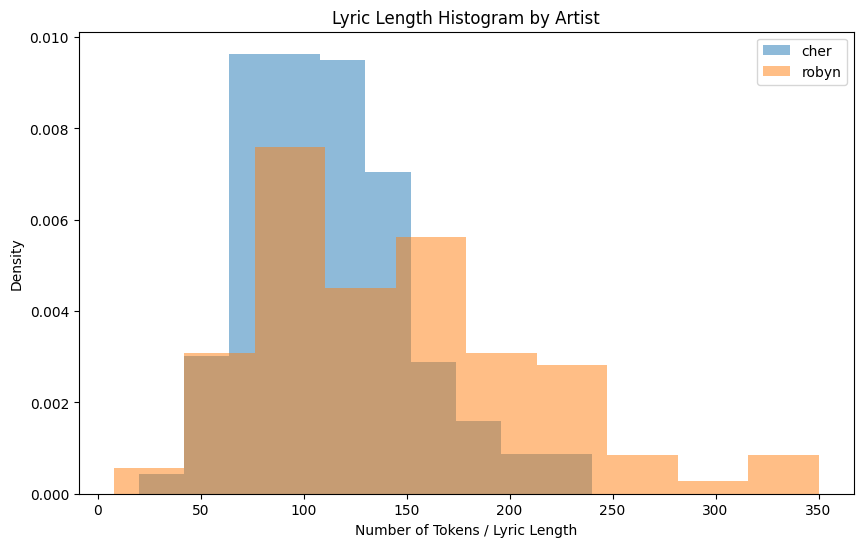

In [27]:
# Calculate each lyric by length and store as 'length' using function above
df['length'] = df['lyrics'].apply(lambda x: len(tokenize_lyrics(x)))

plt.figure(figsize=(10, 6))
df.groupby('artist')['length'].plot(kind="hist",density=True,alpha=0.5,legend=True)
plt.title('Lyric Length Histogram by Artist')
plt.xlabel('Number of Tokens / Lyric Length')
plt.ylabel('Density')